9/12/2020

In [31]:
from __future__ import division
import os
import re
import itertools
from datetime import datetime, timedelta
from sklearn import preprocessing

execfile('./functions/python_libraries.py')
execfile('./functions/LINK.py')
execfile('./functions/parsing.py')  # Sam Way's Code
execfile('./functions/mixing.py')   # Sam Way's Code
execfile('./functions/create_adjacency_matrix.py')
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [32]:
y_predict_type = 'gender' # gender

In [33]:
## 8/21/2018 - set up logforest model
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


percent_initially_unlabelled = [0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)


In [34]:
school = 'Amherst41.csv' 

### Same Train School -- compare with different Test Schools (1x, 2x, 3x, max)

In [35]:
C_vals = [10**x for x in range(-10,100)]
model1 = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            cv = 5, max_iter = 1000)

model2 = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            cv = 5, max_iter = 1000)


model3 = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            cv = 5, max_iter = 1000)

In [36]:
subset_schools = np.array(['Amherst41.csv',
                           'American75.csv',
                        'Berkeley13.csv',
                        'Brown11.csv',
                        'Carnegie49.csv',
                        'Columbia2.csv',
                        'Dartmouth6.csv',
                        'Emory27.csv',
                        'FSU53.csv',
                        'Georgetown15.csv',
                        'Mich67.csv',
                        'Michigan23.csv',
                        'MIT8.csv'])

In [37]:
## tempo only
import numpy as np

In [38]:
# 10-fold
x10 = np.array([0.8987340300624266, 0.8391710551299488, 0.7953987979679382, 0.8430383278501761, 0.7675257592138354])
print(np.mean(x10))
print(np.var(x10))

0.8287735940448652
0.0020142453439970153


In [39]:
#5-fold
x5 = np.array([0.7565478197184409, 0.7623022285255926, 0.8137664058776346, 0.8744880126170742, 0.7564451316151484])
print(np.mean(x5))
print(np.var(x5))

0.7927099196707781
0.00213569842075523


In [40]:
# 3-fold
x3 = np.array([0.9004235399882974, 0.915481878456036, 0.9278703262381668, 0.8456694683081263, 0.7555713139814697])
print(np.mean(x3))
print(np.var(x3))

0.8690033053944193
0.004004819933574742


In [41]:
train_school = 'Amherst41.csv' #'Amherst41.csv' 'MIT8.csv'

## train

## 3x
x_train = pd.read_csv('../../code/refex-rolx-master-3/FB-data/out_union_0.50_FB_'+train_school+'-featureValues.csv', 
                      header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,x_train[0]))})
x_train = x_train.loc[:,1::] #drop IDs column
scaler.fit(x_train) #transform each feature on [0,1]-scale
x_train = scaler.transform(x_train)
y_train_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',train_school) + '_gender.csv')
y_train = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
x_train_m = pd.DataFrame(np.matrix(x_train))

model3.fit(x_train_m,
      y_train.gender_y)



## 2x
x_train = pd.read_csv('../../code/refex-rolx-master-2/FB-data/out_union_0.50_FB_'+train_school+'-featureValues.csv', 
                      header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,x_train[0]))})
x_train = x_train.loc[:,1::] #drop IDs column
scaler.fit(x_train) #transform each feature on [0,1]-scale
x_train = scaler.transform(x_train)
y_train_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',train_school) + '_gender.csv')
y_train = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
x_train_m = pd.DataFrame(np.matrix(x_train))

model2.fit(x_train_m,
      y_train.gender_y)

## 1x
x_train = pd.read_csv('../../code/refex-rolx-master-1/FB-data/out_union_0.50_FB_'+train_school+'-featureValues.csv', 
                      header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,x_train[0]))})
x_train = x_train.loc[:,1::] #drop IDs column
scaler.fit(x_train) #transform each feature on [0,1]-scale
x_train = scaler.transform(x_train)
y_train_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',train_school) + '_gender.csv')
y_train = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
x_train_m = pd.DataFrame(np.matrix(x_train))

model1.fit(x_train_m,
      y_train.gender_y)



LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000, 10000000000000, 100000000000000, 1000000000000000, 10000000000000000, 100000000000000000, 1000000000000000000, ...00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000L],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [42]:
model = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            #class_weight='balanced',
                            cv = 5, max_iter = 1000)

## all
x_train = pd.read_csv('../../code/refex-rolx-master/FB-data/out_union_0.50_FB_'+train_school+'-featureValues.csv', 
                      header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,x_train[0]))})
x_train = x_train.loc[:,1::] #drop IDs column
scaler.fit(x_train) #transform each feature on [0,1]-scale
x_train = scaler.transform(x_train)
y_train_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',train_school) + '_gender.csv')
y_train = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
x_train_m = pd.DataFrame(np.matrix(x_train))


model.fit(x_train_m,
      y_train.gender_y)


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000, 10000000000000, 100000000000000, 1000000000000000, 10000000000000000, 100000000000000000, 1000000000000000000, ...00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000L],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [43]:
test_school = 'Amherst41.csv'
x_test = pd.read_csv('../../code/refex-rolx-master/FB-data/out_union_0.50_FB_'+test_school+'-featureValues.csv', 
                     header = -1)
df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})#np.sort(np.unique(np.concatenate((test[0], test[1]))))})
x_test = x_test.loc[:,1::] #drop IDs column
scaler.fit(x_test) #transform each feature on [0,1]-scale
x_test = scaler.transform(x_test)
y_test_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',test_school) + '_gender.csv')
x_train_names = pd.read_csv('../../code/refex-rolx-master/FB-data/union_unique_featureNames.csv')
x_test_names = pd.read_csv('../../code/refex-rolx-master/FB-data/union_unique_featureNames.csv')
y_test = df_test.merge(y_test_y[['keys','gender_y']],
    how = 'left',
    on = 'keys')
x_test_m = pd.DataFrame(np.matrix(x_test))

    
#model.predict_proba(x_test_m)[:,1]
y_predict_refex = model.predict_proba(x_test_m)[:,1]
print(metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                         y_predict_refex,average='weighted'))
   

0.622762786327022


In [44]:
test_school_array = []

accuracy_record1 = []
auc_record1 = []

accuracy_record2 = []
auc_record2 = []

accuracy_record3 = []
auc_record3 = []

accuracy_record = []
auc_record = []

accuracy_record_baseline = []
auc_record_baseline = []

for test_school in subset_schools:
    print 'train school: ', train_school
    print 'test school: ', test_school
    print ''
    test_school_array.append(test_school)

    ## all
    x_test = pd.read_csv('../../code/refex-rolx-master/FB-data/out_union_0.50_FB_'+test_school+'-featureValues.csv', 
                         header = -1)
    df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})#np.sort(np.unique(np.concatenate((test[0], test[1]))))})
    x_test = x_test.loc[:,1::] #drop IDs column
    scaler.fit(x_test) #transform each feature on [0,1]-scale
    x_test = scaler.transform(x_test)
    y_test_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',test_school) + '_gender.csv')
    x_train_names = pd.read_csv('../../code/refex-rolx-master/FB-data/union_unique_featureNames.csv')
    x_test_names = pd.read_csv('../../code/refex-rolx-master/FB-data/union_unique_featureNames.csv')
    y_test = df_test.merge(y_test_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
    x_test_m = pd.DataFrame(np.matrix(x_test))

    #all
    y_predict_refex = model.predict(x_test_m)
    accuracy_record.append(np.mean(np.array(y_test.gender_y) == np.array(y_predict_refex)))
    y_predict_refex = model.predict_proba(x_test_m)[:,1]
    auc_record.append(metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                         y_predict_refex,average='weighted'))
    

    
    #baseline
    num1 = np.sum(y_train.gender_y==np.max(y_train.gender_y))
    num0 = np.sum(y_train.gender_y==np.min(y_train.gender_y))
    if num1 > num0:
        label = 1
    else:
        label = 0


    y_predict = np.repeat(label,len(y_test))
    y_true = np.array(y_test.gender_y)

    accuracy_record_baseline.append(np.mean(y_true == y_predict))
    auc_record_baseline.append(metrics.roc_auc_score(label_binarize(y_true,np.unique(y_true)),
                                                                        y_predict,average='weighted'))
    
    ## 1x
    x_test = pd.read_csv('../../code/refex-rolx-master-1/FB-data/out_union_0.50_FB_'+test_school+'-featureValues.csv', 
                         header = -1)
    df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})#np.sort(np.unique(np.concatenate((test[0], test[1]))))})
    x_test = x_test.loc[:,1::] #drop IDs column
    scaler.fit(x_test) #transform each feature on [0,1]-scale
    x_test = scaler.transform(x_test)
    y_test_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',test_school) + '_gender.csv')
    x_train_names = pd.read_csv('../../code/refex-rolx-master-1/FB-data/union_unique_featureNames.csv')
    x_test_names = pd.read_csv('../../code/refex-rolx-master-1/FB-data/union_unique_featureNames.csv')
    y_test1 = df_test.merge(y_test_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
    x_test_m1 = pd.DataFrame(np.matrix(x_test))

    #1x
    y_predict_refex1 = model1.predict(x_test_m1)
    accuracy_record1.append(np.mean(np.array(y_test1.gender_y) == np.array(y_predict_refex)))
    y_predict_refex = model1.predict_proba(x_test_m1)[:,1]
    auc_record1.append(metrics.roc_auc_score(label_binarize(y_test1.gender_y,np.unique(y_test1.gender_y)),
                                         y_predict_refex,average='weighted'))
    
    ## 2x
    x_test = pd.read_csv('../../code/refex-rolx-master-2/FB-data/out_union_0.50_FB_'+test_school+'-featureValues.csv', 
                         header = -1)
    df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})#np.sort(np.unique(np.concatenate((test[0], test[1]))))})
    x_test = x_test.loc[:,1::] #drop IDs column
    scaler.fit(x_test) #transform each feature on [0,1]-scale
    x_test = scaler.transform(x_test)
    y_test_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',test_school) + '_gender.csv')
    x_train_names = pd.read_csv('../../code/refex-rolx-master-2/FB-data/union_unique_featureNames.csv')
    x_test_names = pd.read_csv('../../code/refex-rolx-master-2/FB-data/union_unique_featureNames.csv')
    y_test2 = df_test.merge(y_test_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
    x_test_m2 = pd.DataFrame(np.matrix(x_test))

    #2x
    y_predict_refex2= model2.predict(x_test_m2)
    accuracy_record2.append(np.mean(np.array(y_test2.gender_y) == np.array(y_predict_refex)))
    y_predict_refex = model2.predict_proba(x_test_m2)[:,1]
    auc_record2.append(metrics.roc_auc_score(label_binarize(y_test2.gender_y,np.unique(y_test2.gender_y)),
                                         y_predict_refex,average='weighted'))

    
    # 3x
    x_test = pd.read_csv('../../code/refex-rolx-master-3/FB-data/out_union_0.50_FB_'+test_school+'-featureValues.csv', 
                         header = -1)
    df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})#np.sort(np.unique(np.concatenate((test[0], test[1]))))})
    x_test = x_test.loc[:,1::] #drop IDs column
    scaler.fit(x_test) #transform each feature on [0,1]-scale
    x_test = scaler.transform(x_test)
    y_test_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',test_school) + '_gender.csv')
    x_train_names = pd.read_csv('../../code/refex-rolx-master-3/FB-data/union_unique_featureNames.csv')
    x_test_names = pd.read_csv('../../code/refex-rolx-master-3/FB-data/union_unique_featureNames.csv')
    y_test3 = df_test.merge(y_test_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
    x_test_m3 = pd.DataFrame(np.matrix(x_test))

    # 3x
    y_predict_refex3= model3.predict(x_test_m3)
    accuracy_record3.append(np.mean(np.array(y_test3.gender_y) == np.array(y_predict_refex)))
    y_predict_refex = model3.predict_proba(x_test_m3)[:,1]
    auc_record3.append(metrics.roc_auc_score(label_binarize(y_test3.gender_y,np.unique(y_test3.gender_y)),
                                         y_predict_refex,average='weighted'))


train school:  Amherst41.csv
test school:  Amherst41.csv

train school:  Amherst41.csv
test school:  American75.csv

train school:  Amherst41.csv
test school:  Berkeley13.csv

train school:  Amherst41.csv
test school:  Brown11.csv

train school:  Amherst41.csv
test school:  Carnegie49.csv

train school:  Amherst41.csv
test school:  Columbia2.csv

train school:  Amherst41.csv
test school:  Dartmouth6.csv

train school:  Amherst41.csv
test school:  Emory27.csv

train school:  Amherst41.csv
test school:  FSU53.csv

train school:  Amherst41.csv
test school:  Georgetown15.csv

train school:  Amherst41.csv
test school:  Mich67.csv

train school:  Amherst41.csv
test school:  Michigan23.csv

train school:  Amherst41.csv
test school:  MIT8.csv



In [45]:
subset_schools_new = [w.replace('.csv','') for w in subset_schools]

In [46]:
subset_schools_new

['Amherst41',
 'American75',
 'Berkeley13',
 'Brown11',
 'Carnegie49',
 'Columbia2',
 'Dartmouth6',
 'Emory27',
 'FSU53',
 'Georgetown15',
 'Mich67',
 'Michigan23',
 'MIT8']

In [47]:
school_names = ['Amherst',
               'American',
               'Berkeley',
                'Brown',
               'Carnegie',
               'Columbia',
               'Dartmouth',
               'Emory',
               'FSU',
               'Georgetown',
               'Mich',
               'Michigan',
               'MIT']
len(school_names)

13

In [48]:
auc_record

[0.622762786327022,
 0.47683274763227296,
 0.4967348733434654,
 0.5077012594456716,
 0.48738203615399855,
 0.5054593268075317,
 0.49402122445630803,
 0.47837109069257516,
 0.5020266368170387,
 0.5041618103016282,
 0.5455358613652765,
 0.5150467664324749,
 0.4806578114882532]

In [49]:
school_names[1::]

['American',
 'Berkeley',
 'Brown',
 'Carnegie',
 'Columbia',
 'Dartmouth',
 'Emory',
 'FSU',
 'Georgetown',
 'Mich',
 'Michigan',
 'MIT']

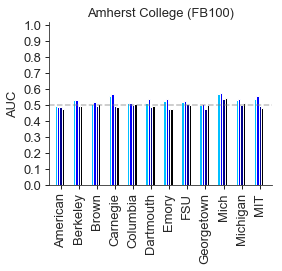

In [50]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                    sharey=False, sharex=False,
                figsize=(4,3))#
plt.setp(ax1, xticks=[ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15., 16.5, 18], 
         xticklabels=school_names[1::])#subset_schools_new)
plt.setp(ax1.get_xticklabels(), 
         rotation=90, size = 13)


ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,labelsize = 13)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)

w = 1.5
width = 0.2

ax1.bar(np.array(range(len(auc_record1[1::])))*w-0.4,auc_record1[1::], color = 'deepskyblue',# alpha = 0.5,
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(auc_record2[1::])))*w-0.2,auc_record2[1::], color = 'blue', #alpha = 0.5,
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(auc_record3[1::])))*w-0,auc_record3[1::], color = 'darkblue', #alpha = 0.5,
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(auc_record[1::])))*w+0.2,auc_record[1::], color = 'black', #alpha = 0.5,
       width = width, edgecolor = 'white')
ax1.set_ylabel('AUC', size=13)

ax1.set_ylim(0,1.02)
plt.yticks(np.arange(0,1.02,0.1), size = 13)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,17.5)
#ax1.set_title(train_school)
ax1.set_title(train_school, size = 10)


if train_school=='MIT8.csv':
    plt.title('MIT (FB100)',fontsize=14)

if train_school=='Amherst41.csv':
    plt.title('Amherst College (FB100)',fontsize=13)
#plt.tight_layout()


#if RF:
#    if undersampling:
#        pp = PdfPages('../figs/' + train_school + '_NEWAUC_across_RF_undersampling.pdf')
#    else:
#        pp = PdfPages('../figs/' + train_school + '_NEWAUC_across_RF.pdf')
#pp.savefig()
#pp.close()

In [ ]:
df_results = pd.DataFrame({'test': school_names[1::],
                           'refex-1': auc_record1[1::],
                           'refex-2': auc_record2[1::],
                           'refex-3': auc_record3[1::],
                           'refex-max': auc_record[1::]
                            })
df_results.to_csv('NEWFBAcrossResultsICWSMRevision.csv',sep=',', index = False)